<center> <a href="https://github.com/CyConProject?tab=repositories">
  <img src="https://github.com/CyConProject/Lab/blob/main/Figures/CyCon.png?raw=true" alt="logo" width="80" >
</a>
 </center>


# Support Vector Machine (SVM)

In this lab, we will explore the Support Vector Machine (SVM) algorithm, a powerful tool for classification tasks across various domains. By mastering SVM, you'll gain insights into more advanced methods used for classification tasks, essential for advanced data science applications.

Imagine using SVM to classify different types of construction materials based on features such as density, tensile strength, and elasticity. This classification capability can help engineers select the appropriate materials for specific construction tasks, leading to more efficient and safer project outcomes. These are examples of decision-making scenarios in construction where SVM can provide clear insights and predictions.

At its core, SVM is a supervised learning method used for both binary and multiclass classification. The algorithm finds the optimal hyperplane that best separates the classes in the feature space, making it a versatile and robust classifier. SVM can use different kernel functions to handle linear and non-linear classification tasks effectively.

### Objectives:

During this lab, we will explore several key aspects of the SVM algorithm, including:

- **Data Preparation**: Learn to prepare and clean your data, ensuring it is suitable for building an SVM model.
- **Model Building**: Construct an SVM model to classify outcomes based on a range of input features.
- **Model Evaluation**: Evaluate the performance of your SVM model and learn to interpret its results to make informed decisions.
- **Advanced Evaluation Metrics**: Understand and apply advanced evaluation metrics such as Confusion Matrix, Jaccard Index, and Accuracy Score to assess model performance.

By the end of this lab, you will not only understand how the SVM algorithm functions but also how to implement it to solve real-world problems effectively within the construction field. So, let's dive into the detailed and fascinating world of Support Vector Machines!


### Step 1: Import necessary libraries

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, jaccard_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns

### Step 2: Load the dataset

In [2]:
# Load the Culvert Dataset
data = pd.read_csv('https://raw.githubusercontent.com/CyConProject/Lab/main/Datasets/Augmented%20Culvert%20Dataset.csv')

# Display the first few rows of the dataset to understand its structure
data.head()

,length,cul_matl,cul_type,Soil_Drainage_Class,Soil_Moisture,Soil_pH,Soil_Elec_Conductivity,Soil_Surface_Texture,Flooding_Frequency,State,Age,Cul_rating
0,62.1,Steel Plate,Arch,Somewhat excessively drained,6.5,7.6,0.0,Fine Sandy Loam,Occasional,1,86,0
1,24.0,Corrugated Steel,Round,Poorly drained,3.8,5.7,0.0,Fine Sandy Loam,Frequent,2,50,0
2,21.0,Unreinforced Concrete,Box,Poorly drained,14.8,6.7,0.0,Moderately Decomposed Plant Material,Occasional,1,62,0
3,21.0,Unreinforced Concrete,Box,Well drained,10.3,9.4,5.7,Clay Loam,NaN,1,75,0
4,36.0,Corrugated Steel,Round,Moderately well drained,2.6,5.3,0.0,Fine Sandy Loam,NaN,2,43,0


#### `Augmented Culvert Dataset.csv`:

**Context:**
This dataset focuses on the condition assessment of culverts based on their physical and environmental attributes. Culverts are structures that allow water to flow under a road, railroad, trail, or similar obstruction. It comprises 4,435 records collected from four different states, combining their individual culvert inventories into a robust dataset suitable for multiclass classification.

**Target:**
The target variable of the dataset is the condition of the culverts, categorized into various classes representing different levels of structural integrity and functionality. The culvert condition rating ranges from 0 to 4, where 0 represents a critical condition and 4 represents an excellent condition.

**Attributes:**
1. length: The length of the culvert (in feet).
2. cul_matl (Culvert Material): Material of the culvert, such as Corrugated Steel or Poly Vinyl Chloride.
3. cul_type (Culvert Type): Shape or type of the culvert, e.g., Round.
4. Soil_Drainage_Class: Classification of the soil drainage at the culvert location.
4. Soil_Moisture: Soil moisture level at the culvert location.
4. Soil_pH: Soil pH level, indicating the acidity or alkalinity.
4. Soil_Elec_Conductivity (Soil Electrical Conductivity): Measures the soil's ability to conduct electric current.
4. Soil_Surface_Texture: Texture of the soil surface around the culvert.
4. Flooding_Frequency: Frequency of flooding at the culvert location.
4. State: State in which the culvert is located.
4. Age: Age of the culvert (in years, since installation).
12. Cul_rating (Culvert Rating): The culvert condition rating.

These features are used to predict the condition of the culverts, in order to prioritize maintenance and inspection efforts efficiently.

### Step 3: Pre-processing

**Handling Missing Data: Filling Blanks**

We must identify any blank values to ensure our data is ready for training. The command `data.isnull().sum()` checks each column for missing entries and sums them.

In [3]:
missing_values_count = data.isnull().sum()
print(missing_values_count)

length                       0
cul_matl                     0
cul_type                     0
Soil_Drainage_Class          0
Soil_Moisture                0
Soil_pH                      0
Soil_Elec_Conductivity       0
Soil_Surface_Texture         0
Flooding_Frequency        3468
State                        0
Age                          0
Cul_rating                   0
dtype: int64


The 'Flooding_Frequency' column in our dataset has 3,468 missing values. To handle this, we use a command that fills these blanks with 'None.' This method is chosen because, in this specific dataset, no entry in 'Flooding_Frequency' suggests that there was no flooding (but this is not always the case so be careful!). While there are many strategies to deal with missing data, this approach is particularly suited to our data’s specific characteristics.

In [4]:
# Fill missing values with a specific category, e.g., 'None'
data['Flooding_Frequency'].fillna(value='None', inplace=True)
data.head()

,length,cul_matl,cul_type,Soil_Drainage_Class,Soil_Moisture,Soil_pH,Soil_Elec_Conductivity,Soil_Surface_Texture,Flooding_Frequency,State,Age,Cul_rating
0,62.1,Steel Plate,Arch,Somewhat excessively drained,6.5,7.6,0.0,Fine Sandy Loam,Occasional,1,86,0
1,24.0,Corrugated Steel,Round,Poorly drained,3.8,5.7,0.0,Fine Sandy Loam,Frequent,2,50,0
2,21.0,Unreinforced Concrete,Box,Poorly drained,14.8,6.7,0.0,Moderately Decomposed Plant Material,Occasional,1,62,0
3,21.0,Unreinforced Concrete,Box,Well drained,10.3,9.4,5.7,Clay Loam,None,1,75,0
4,36.0,Corrugated Steel,Round,Moderately well drained,2.6,5.3,0.0,Fine Sandy Loam,None,2,43,0


**Make the Target Binary**

We adjust the 'Cul_rating' column to create a binary target for SVM analysis. Ratings of 0 and 1 are categorized as 0 (needs repair), while ratings of 2, 3, and 4 are categorized as 1 (satisfactory to good condition). This simplifies the dataset for analyzing the necessity of repairs.

In [5]:
# Create a new list to store the binary values
binary_ratings = []

# Loop through each rating in the 'Cul_rating' column
for rating in data['Cul_rating']:
    # If the rating is 0 or 1, it indicates the structure needs repair
    if rating in [0, 1]:
        binary_ratings.append(0)
    # Otherwise, the rating indicates the structure is in satisfactory to good condition
    else:
        binary_ratings.append(1)

# Replace the original 'Cul_rating' column with the new binary values
data['Cul_rating'] = binary_ratings


**Handling Categorical Features for SVM**

In SVM classification, it is crucial to handle categorical features appropriately because SVM algorithms require numerical input to perform calculations. Categorical variables like 'cul_matl', 'cul_type', and others listed in your dataset are typically stored as text or categories, which are not directly interpretable by SVM models.

Non-numeric columns can be found using the following code:

In [6]:
data.dtypes

length                    float64
cul_matl                   object
cul_type                   object
Soil_Drainage_Class        object
Soil_Moisture             float64
Soil_pH                   float64
Soil_Elec_Conductivity    float64
Soil_Surface_Texture       object
Flooding_Frequency         object
State                       int64
Age                         int64
Cul_rating                  int64
dtype: object

By applying the `LabelEncoder`, we transform these categorical labels into numerical values. This numerical transformation ensures that the SVM algorithm can effectively incorporate these features into its predictive model. Storing the label encoder for each column also allows us to reverse the transformation if needed, which can be useful for interpreting the model's predictions or applying the model to new data while maintaining consistency in how categories are encoded.

In [7]:
# List of categorical columns that need to be label-encoded
categorical_columns = ['cul_matl', 'cul_type', 'Soil_Drainage_Class', 'Soil_Surface_Texture', 'Flooding_Frequency']

# Applying LabelEncoder to the categorical columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le  # Store the label encoder for each column

data.head()

,length,cul_matl,cul_type,Soil_Drainage_Class,Soil_Moisture,Soil_pH,Soil_Elec_Conductivity,Soil_Surface_Texture,Flooding_Frequency,State,Age,Cul_rating
0,62.1,5,0,3,6.5,7.6,0.0,12,2,1,86,0
1,24.0,1,4,2,3.8,5.7,0.0,12,0,2,50,0
2,21.0,6,1,2,14.8,6.7,0.0,28,2,1,62,0
3,21.0,6,1,6,10.3,9.4,5.7,4,1,1,75,0
4,36.0,1,4,1,2.6,5.3,0.0,12,1,2,43,0


## Practice

Let's review the data types of the columns once more.

In [8]:
# Your Code Here


<details><summary>Click here for the answer</summary>

```python   
data.dtypes
```

</details>

### Step 4: Extracting Features and Target
We extract the features (X) and the target variable (y) from the dataset. Features are all columns except 'Cul_rating'. 'Cul_rating' represents whether the culvert needs to be repaired (0) or not (1).

In [9]:
# Prepare the data
X = data.drop('Cul_rating', axis=1)
y = data['Cul_rating']

Let's examine the distribution of the classes based on Soil Moisture and Age:

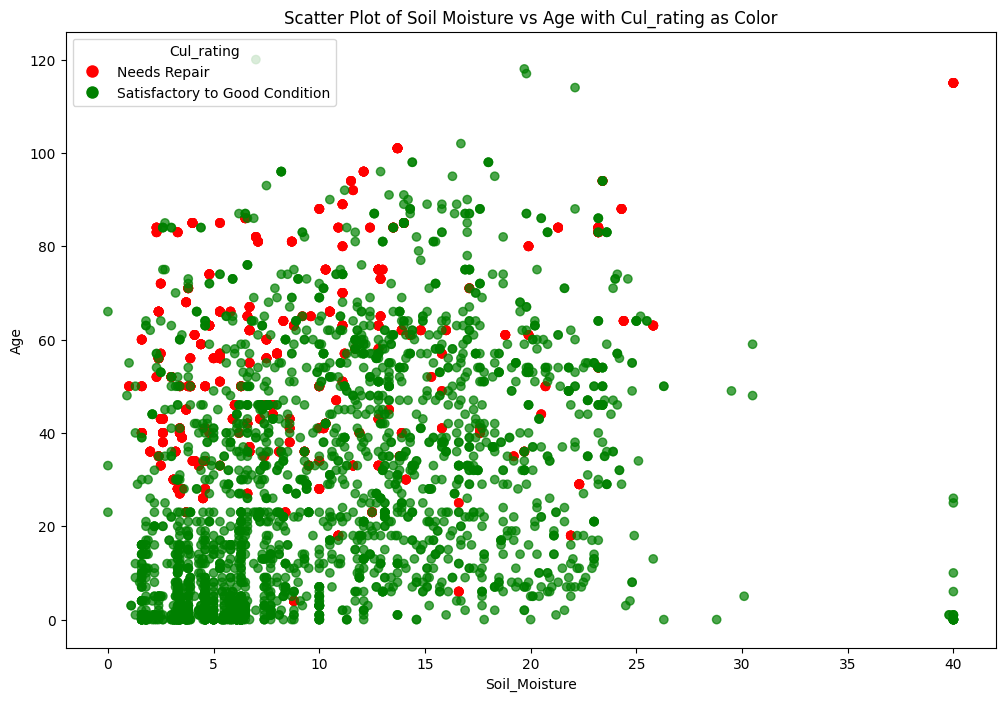

In [10]:
# Plot the scatter plot with two features and Cul_rating as colors
plt.figure(figsize=(12, 8))
colors = {0: 'red', 1: 'green'}
labels = {0: 'Needs Repair', 1: 'Satisfactory to Good Condition'}
# Create a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=clr, markersize=10, label=labels[lbl]) for lbl, clr in colors.items()]
plt.legend(title="Cul_rating", handles=handles)
scatter = plt.scatter(X['Soil_Moisture'], X['Age'], c=y.map(colors), alpha=0.7)
plt.xlabel('Soil_Moisture')
plt.ylabel('Age')
plt.title('Scatter Plot of Soil Moisture vs Age with Cul_rating as Color')
plt.show()


As you can see, while there are culverts needing repair at various soil moisture and age levels, a higher concentration of culverts in satisfactory condition appears at lower soil moisture and younger age ranges.

### Step 5: Normalizing Data

Scaling the data is highly recommended when using SVMs. Here's why:

1. **Sensitivity to Feature Scale**: SVMs are sensitive to the scale of the input features. Features with larger scales can dominate the calculation of the distance between points, leading to suboptimal decision boundaries.

2. **Kernel Functions**: If you are using a kernel like the Radial Basis Function (RBF) or polynomial kernels, scaling ensures that all features contribute equally to the decision boundary.

3. **Convergence**: Scaling can help the algorithm converge faster. When features are on a similar scale, the optimization process is more stable and efficient.

In [11]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.09216197,  0.75842971, -1.86827066, -0.58400929, -0.52448375,
         0.64478817, -0.34497845, -1.10021968,  0.72726538, -0.95808683,
         1.78090185],
       [-0.44536946, -1.12543239,  0.7821189 , -1.05077469, -0.93386169,
        -0.75309891, -0.34497845, -1.10021968, -1.26989992,  0.03562577,
         0.42037059],
       [-0.48769477,  1.22939524, -1.20567327, -1.05077469,  0.73397435,
        -0.01736887, -0.34497845,  0.1507271 ,  0.72726538, -0.95808683,
         0.87388101],
       [-0.48769477,  1.22939524, -1.20567327,  0.81628691,  0.05167779,
         1.96910224,  1.11502333, -1.72569308, -0.27131727, -0.95808683,
         1.36518396],
       [-0.27606822, -1.12543239,  0.7821189 , -1.5175401 , -1.11580743,
        -1.04739093, -0.34497845, -1.10021968, -0.27131727,  0.03562577,
         0.15582284]])

### Step 6: Create train and test datasets
In this step, we split the dataset into a training set and a testing set. In this example, we use a 75-25 split, with 75% of the data for training and 25% for testing.

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Step 7: Initializing and Training the SVM Classifier

When we utilize the `SVC` (Support Vector Classification) class from the Scikit-learn library, we are employing a powerful method for both binary and multi-class classification problems. This classifier uses a technique called the kernel trick to transform the data and find an optimal boundary between the possible outputs. Here are some of the key parameters you can tweak:

1. **kernel**: This parameter specifies the kernel type to be used in the algorithm. Common choices include:
   - `'linear'`: Uses a linear kernel.
   - `'poly'`: Uses a polynomial kernel.
   - `'rbf'`: Uses a radial basis function kernel, which is the default and often the best choice for non-linear problems.
   - `'sigmoid'`: Uses a sigmoid kernel.

2. **C**: This parameter is known as the regularization parameter. It controls the trade-off between achieving a low error on the training data and minimizing the model complexity. A smaller value of **C** creates a larger margin, which means more regularization and a simpler decision boundary that might underfit the data. Conversely, a larger value of **C** means less regularization and a more complex decision boundary that might overfit the data.

3. **degree**: This parameter is relevant when using the `'poly'` kernel. It defines the degree of the polynomial kernel function (higher degree means a more complex model).

4. **max_iter**: This controls the maximum number of iterations for the algorithm to converge. It ensures the optimization process terminates and can help balance the computational time and model accuracy.

These parameters are crucial for fitting your SVM model to your specific dataset and predictive accuracy requirements.

In [13]:
# Initialize the SVM classifier
svm_model = SVC(kernel='rbf', C=1.0, max_iter=1000)

# Train the model
svm_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(max_iter=1000)

In this example, we used:
- The `'rbf'` kernel for capturing non-linear relationships.
- The `C` parameter set to 1.0 for a balance between underfitting and overfitting.
- The `max_iter` parameter set to 1000 to ensure sufficient iterations for convergence.

## Practice

To familiarize yourself with the various parameters of the SVM model, retrieve and print all the model parameters.

In [14]:
# Your Code Here


<details><summary>Click here for the answer</summary>

```python   
# Retrieve and print model parameters, each on a new line
params = svm_model.get_params()
print('Model Parameters:')
for key, value in params.items():
    print(f'{key}: {value}')
```

</details>

If you are willing to know more about these parameters, please see this page: [Scikit-learn SVC Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

### Step 8: Evaluating the Model

In this step, we will evaluate the performance of our SVM model using various metrics: Jaccard Index, Confusion Matrix, F1 score, and Accuracy Score. These metrics will provide us with a comprehensive understanding of how well our model is performing.

In [15]:
# Predict the labels for the test set
y_pred = svm_model.predict(X_test)

#### Jaccard Index
The Jaccard Index is a measure of the similarity between the predicted and actual labels. It is calculated as the size of the intersection divided by the size of the union of the sample sets. A Jaccard Index of 0.779 indicates a high level of similarity, suggesting that our model's predictions are quite accurate.

In [16]:
# Calculate Jaccard Index
jaccard = jaccard_score(y_test, y_pred, average='binary')
print(f'Jaccard Index: {jaccard}')

Jaccard Index: 0.7794117647058824


#### Confusion Matrix
As explained before, the Confusion Matrix is a table used to describe the performance of a classification model. It displays the counts of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions. Here's our confusion matrix:

- **True Negatives (TN)**: 429
- **False Positives (FP)**: 56
- **False Negatives (FN)**: 94
- **True Positives (TP)**: 530

This matrix shows that our model correctly identified 429 negative cases and 530 positive cases, while it misclassified 56 negative cases as positive (56 cases needed repair but were classified as satisfactory) and 94 positive cases as negative.

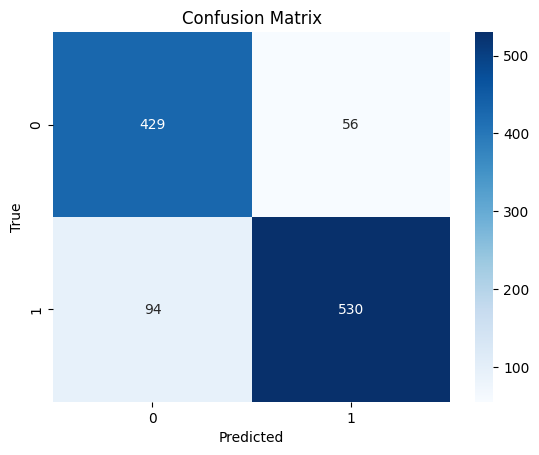

In [17]:
# Calculate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### F1 Score
The F1 Score is the harmonic mean of precision and recall, providing a balance between the two metrics. It is particularly useful for imbalanced datasets. Our F1 Score of 0.876 indicates a high level of performance, meaning that our model is effective in predicting both positive and negative cases accurately.

In [18]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred, average='binary')
print(f'F1 Score: {f1}')

F1 Score: 0.8760330578512396


#### Accuracy Score
The Accuracy Score is the ratio of correctly predicted instances to the total instances. Our Accuracy Score of approximately 0.865 suggests that 86.5% of the predictions made by our model are correct.

In [19]:
# Calculate Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy}')

Accuracy Score: 0.8647430117222723


The SVM model outperforms the Logistic Regression model (previous lab) across all evaluated metrics. It has a higher Jaccard Index, F1 Score, and Accuracy, with fewer false positives and false negatives in the confusion matrix. This suggests that the SVM model is more effective in predicting the condition of culverts **using this dataset**, and it provides a more reliable classification for better decision-making in maintenance and repair operations.

## Practice

Create a new SVM model using the same dataset, but this time, experiment with different kernel functions (e.g., `linear`, `poly`, `rbf`, `sigmoid`) and three different regularization parameters (`C`). After training your model, assess its performance by analyzing the confusion matrix, Jaccard index, and accuracy score.

In [20]:
# Your Code Here


<details><summary>Click here for the answer</summary>

```python    
# Initialize lists to store results
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = []

for kernel in kernels:
    for C in [0.1, 1, 10]:
        # Create and train the SVM model with different kernel functions and regularization parameters
        svm_model = SVC(kernel=kernel, C=C)
        svm_model.fit(X_train, y_train)

        # Make predictions
        y_pred = svm_model.predict(X_test)

        # Evaluate the model
        cm = confusion_matrix(y_test, y_pred)
        jaccard = jaccard_score(y_test, y_pred, average='weighted')
        accuracy = accuracy_score(y_test, y_pred)

        # Store results
        results.append({
            'Kernel': kernel,
            'C': C,
            'Confusion Matrix': cm,
            'Jaccard Index': jaccard,
            'Accuracy': accuracy
        })

# Print results
for result in results:
    print(f"Kernel: {result['Kernel']}, C: {result['C']}")
    print(f"Confusion Matrix:\n{result['Confusion Matrix']}")
    print(f"Jaccard Index: {result['Jaccard Index']}")
    print(f"Accuracy: {result['Accuracy']}\n")

```

</details>

### Thank you and good luck!